In [ ]:
import pandas as pd  # Import pandas for data manipulation
import numpy as np   # Import numpy for numerical operations
import seaborn as sns  # Import seaborn for data visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define the URL of the CSV file
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv"

# Load the CSV file from the URL into a pandas DataFrame
data = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(data.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Drop rows with any missing values
data = data.dropna()
print(data.isnull().sum())  # Confirm that there are no missing values

# Display the distribution of the 'Potability' column
print(data['Potability'].value_counts())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
Potability
0    1200
1     811
Name: count, dtype: int64


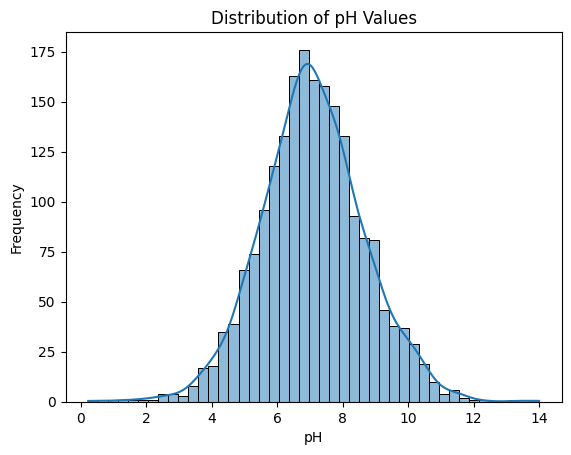

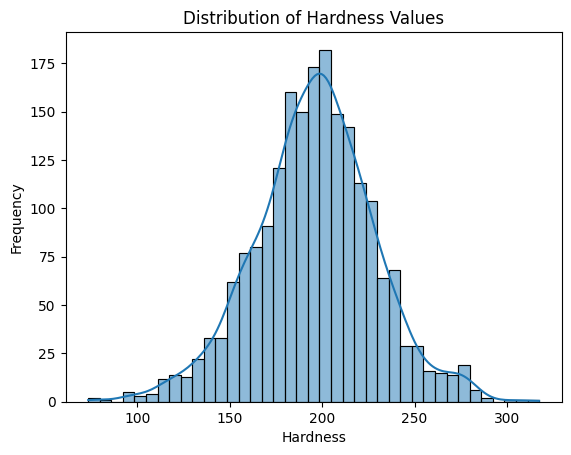

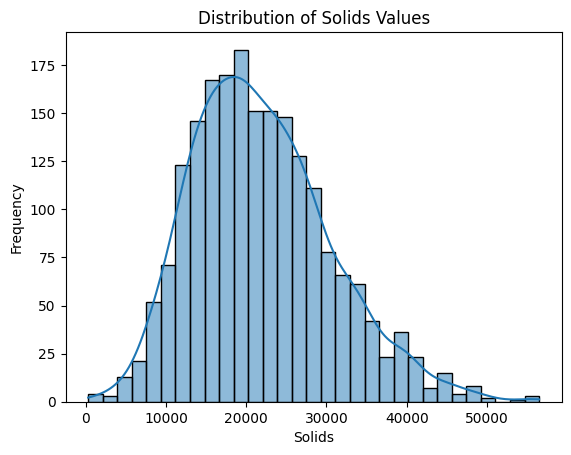

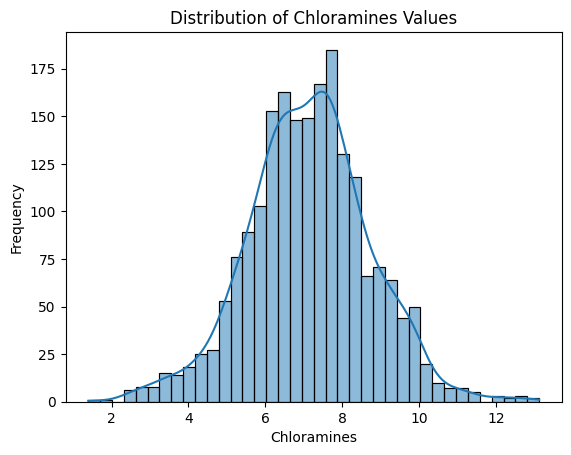

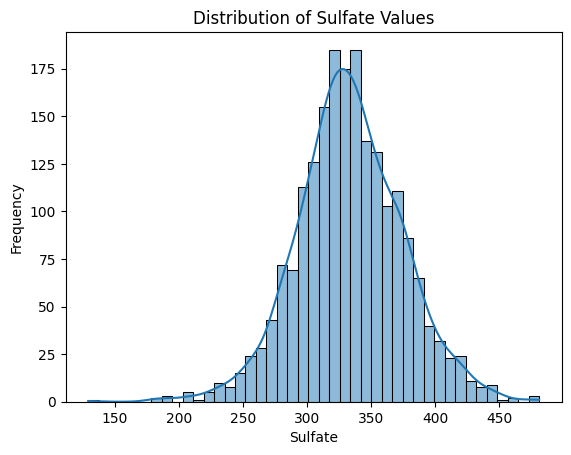

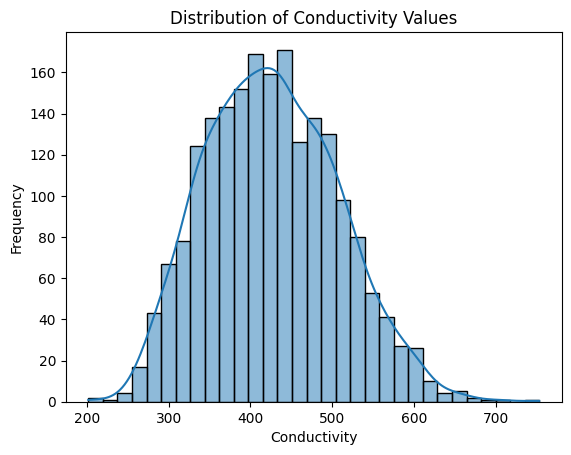

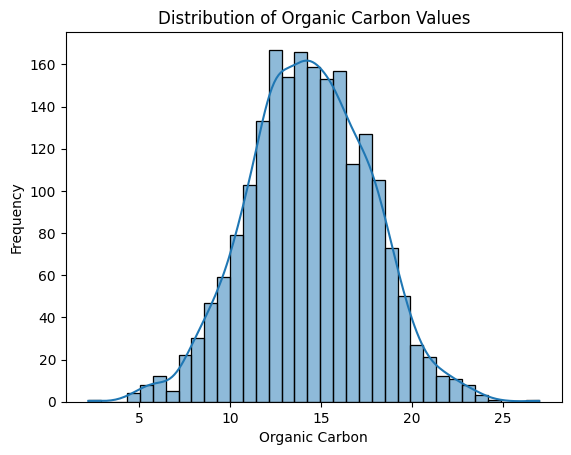

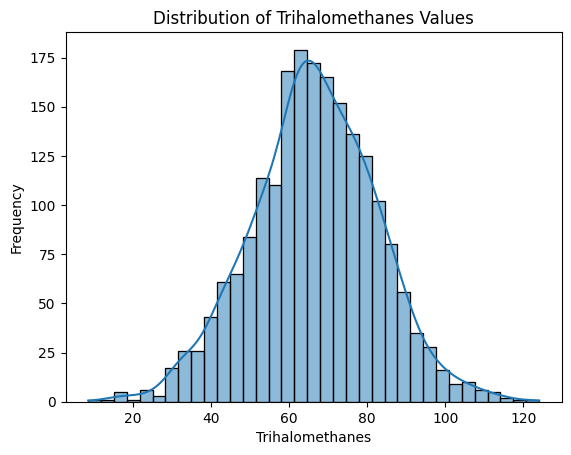

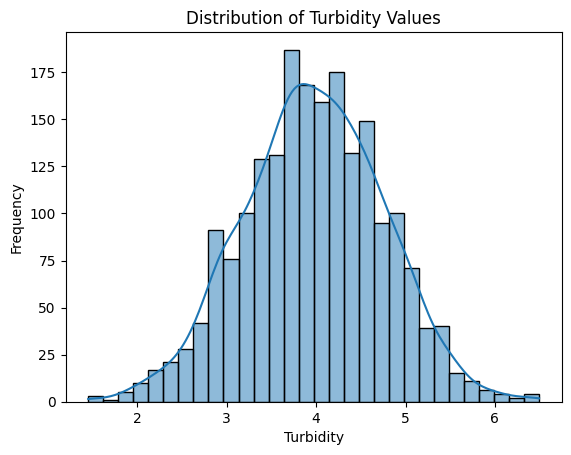

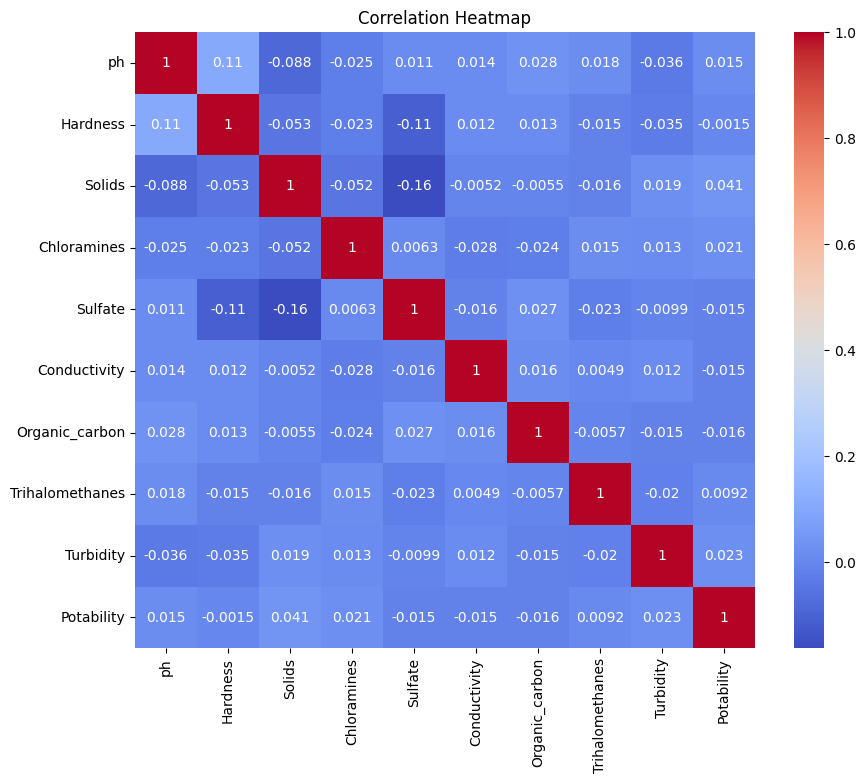

In [ ]:
# Plot the distribution of pH values
sns.histplot(data['ph'], kde=True)
plt.title('Distribution of pH Values')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Hardness values
sns.histplot(data['Hardness'], kde=True)
plt.title('Distribution of Hardness Values')
plt.xlabel('Hardness')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Solids values
sns.histplot(data['Solids'], kde=True)
plt.title('Distribution of Solids Values')
plt.xlabel('Solids')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Chloramines values
sns.histplot(data['Chloramines'], kde=True)
plt.title('Distribution of Chloramines Values')
plt.xlabel('Chloramines')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Sulfate values
sns.histplot(data['Sulfate'], kde=True)
plt.title('Distribution of Sulfate Values')
plt.xlabel('Sulfate')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Conductivity values
sns.histplot(data['Conductivity'], kde=True)
plt.title('Distribution of Conductivity Values')
plt.xlabel('Conductivity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Organic Carbon values
sns.histplot(data['Organic_carbon'], kde=True)
plt.title('Distribution of Organic Carbon Values')
plt.xlabel('Organic Carbon')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Trihalomethanes values
sns.histplot(data['Trihalomethanes'], kde=True)
plt.title('Distribution of Trihalomethanes Values')
plt.xlabel('Trihalomethanes')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Turbidity values
sns.histplot(data['Turbidity'], kde=True)
plt.title('Distribution of Turbidity Values')
plt.xlabel('Turbidity')
plt.ylabel('Frequency')
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Define features (X) and target (y)
X = data.drop('Potability', axis=1)  # Features are all columns except 'Potability'
y = data['Potability']  # Target is the 'Potability' column

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6377171215880894
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       231
           1       0.61      0.41      0.49       172

    accuracy                           0.64       403
   macro avg       0.63      0.61      0.60       403
weighted avg       0.63      0.64      0.62       403

